In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [4]:
df =  pd.read_csv("D:\Py Django\DataScience\Regression\Logistic Regression\Binomial\churn_data.csv")
df.isna().sum()
df

,CustomerID,Gender,AgeGroup,Region,SubscriptionType,MonthlyUsage,SupportCalls,Churn
0,CUST0001,Male,Young,North,Basic,40.7,2,Yes
1,CUST0002,Female,Senior,West,Standard,16.5,2,No
2,CUST0003,Male,Middle,East,Basic,46.9,6,Yes
3,CUST0004,Male,Senior,North,Standard,38.0,5,No
4,CUST0005,Male,Young,East,Basic,70.9,8,Yes
...,...,...,...,...,...,...,...,...
795,CUST0796,Male,Senior,West,Standard,55.5,5,No
796,CUST0797,Male,Senior,West,Basic,94.7,9,No
797,CUST0798,Male,Senior,North,Basic,88.9,4,No
798,CUST0799,Male,Middle,North,Standard,19.2,3,No


In [5]:
Gender	= LabelEncoder()
AgeGroup = LabelEncoder()
Region = LabelEncoder()
SubscriptionType = LabelEncoder()
Churn = LabelEncoder()

df["Gender"] = Gender.fit_transform(df["Gender"])
df["AgeGroup"] = AgeGroup.fit_transform(df["AgeGroup"])
df["Region"] = Region.fit_transform(df["Region"])
df["SubscriptionType"] = SubscriptionType.fit_transform(df["SubscriptionType"])
df["Churn"] = Churn.fit_transform(df["Churn"])

In [6]:
x =  df.drop(["Churn","CustomerID"],axis = 1)
y = df["Churn"]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=23)

In [8]:
model = LogisticRegression()
model.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [9]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [10]:
mse = mean_squared_error(y_pred,y_test)
mse

Loss = log_loss(y_test,y_pred)
Loss

4.054911006275679

c:\Users\91702\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Predicted Churn: No


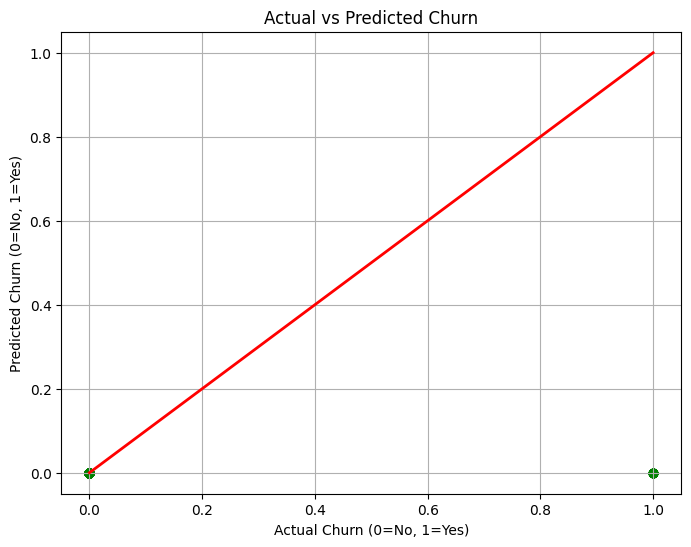

In [11]:
new_gender = Gender.transform(['Male'])[0]
new_age = AgeGroup.transform(['Young'])[0]
new_region = Region.transform(['South'])[0]
subscription_type =  SubscriptionType.transform(['Premium'])[0]


new_data = np.array([[new_gender, new_age, new_region, subscription_type, 60.5, 3]])

new_pred = model.predict(new_data)
print("Predicted Churn:", Churn.inverse_transform(new_pred)[0])


plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linewidth=2, label='Perfect Fit Line')
plt.xlabel('Actual Churn (0=No, 1=Yes)')
plt.ylabel('Predicted Churn (0=No, 1=Yes)')
plt.title('Actual vs Predicted Churn')
plt.grid()
plt.show()
